Bayesian regression su training set generato artificialmente. Mostra distribuzione a posteriori dei coefficienti e risultati sampling di modelli (rette di regressione)

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [13]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['lines.linewidth'] = 2

# definisce un vettore di colori
colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

Funzione base polinomiale di grado $d$

In [14]:
def vphi(x, d):
    return np.array([x**i for i in range(d)]).T

Generazione dataset

In [21]:
# numero di elementi da generare
n=50

# genera la matrice delle features e il vettore target
# dominio della feature
domain=(0,2*np.pi)
# array delle feature generato uniformemente nel dominio
X=np.random.uniform(domain[0], domain[1], n)

# genera il vettore target mediante la funzione f e l'aggiunta di rumore gaussiano
# funzione 
def f(x):
    return 0.7+0.25*x*np.sqrt(abs(np.sin(x)))
# sd del rumore
noise = .05

#genera target
t=np.array([(f(v)+np.random.normal(0,noise,1))[0] for v in X]).reshape(-1,1)

# genera immagine di X per la regressione
n_coeff = 2
Phi = vphi(X,n_coeff)

Visualizza training set

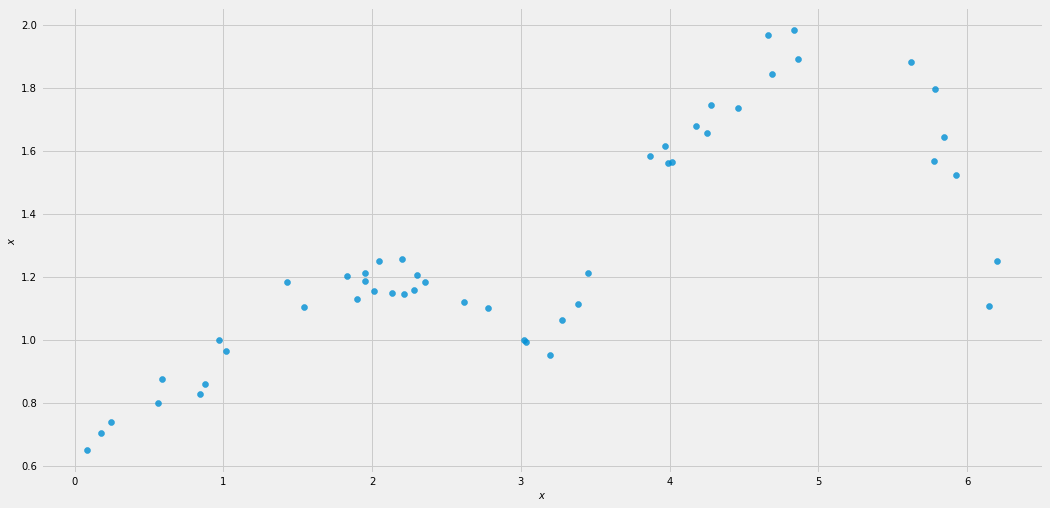

In [23]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(X, t, marker='o', alpha=.8)
plt.xlabel(u'$x$', fontsize=10)
plt.ylabel(u'$x$', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Distribuzione a priori

In [32]:
# iperparametro per il prior
alfa=.01
# parametri del prior
mu_prior=np.zeros(2)
sigma_prior=np.eye(2)*alfa

# parametro per la verosimiglianza
beta=9

# distribuzione a priori dei parametri
func=np.vectorize(lambda x,y:st.multivariate_normal.pdf([x,y],mu_prior,sigma_prior))

Rappresentazione della distribuzione su una griglia

In [33]:
# definisce un array di 500 valori distribuiti lineramente tra -1 e 1 per la dimensione x
x = np.linspace(-1, 1, 200)
# definisce un array di 500 valori distribuiti lineramente tra -1 e 1 per la dimensione y
y = np.linspace(-1, 1, 200)
# definisce una griglia bidimensionale a partire dagli array per x e y
# in X i valori delle ascisse dei punti sulla griglia, in Y i valori delle ordinate
XX,YY = np.meshgrid(x, y)
# calcola in Z i valori della funzione su tutti i punti della griglia
Z=func(XX,YY)

xx=np.linspace(min(X),max(X),500)
Phixx=vphi(xx,n_coeff)

sample_prior=np.random.multivariate_normal(mu_prior, sigma_prior, 10)

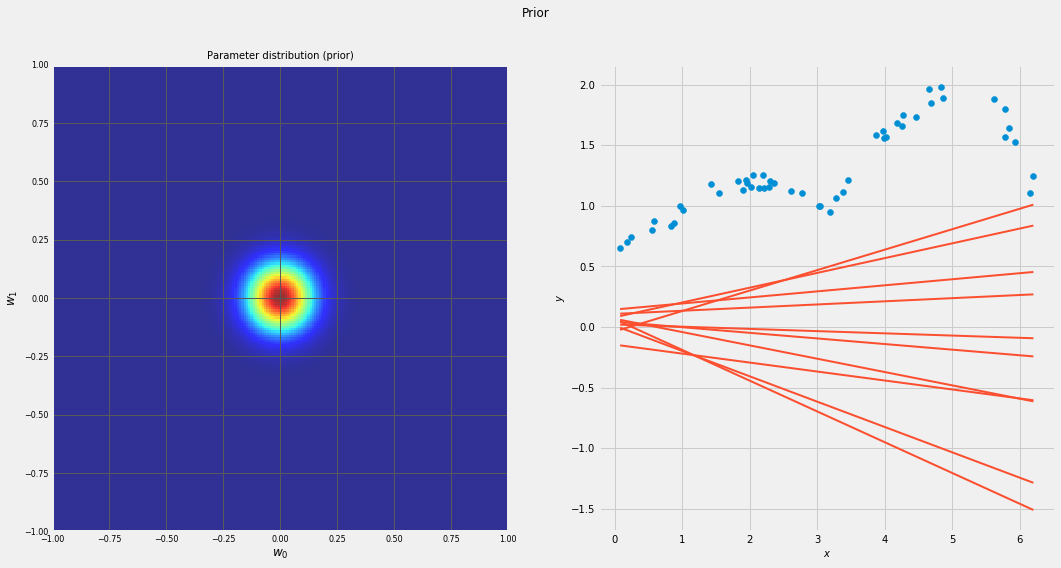

In [34]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax=plt.subplot(1,2,1)
imshow_handle = ax.imshow(Z, origin='lower', extent=(x.min(),x.max(), y.min(), y.max()), aspect='auto', alpha=.8)
ax.set_xlabel('$w_0$', fontsize=12)
ax.set_ylabel('$w_1$', fontsize=12)
plt.xlim(-1,1)
plt.ylim(-1,1)
ax.set_title('Parameter distribution (prior)')
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.grid(b=True, which='both', color='0.35')
ax=plt.subplot(1,2,2)
ax.scatter(X, t, marker='o', alpha=1)
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$y$', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for w in sample_prior:
    yy=Phixx.dot(w)
    ax.plot(xx,yy, c=colors[1])
plt.suptitle(u'Prior')
plt.show()

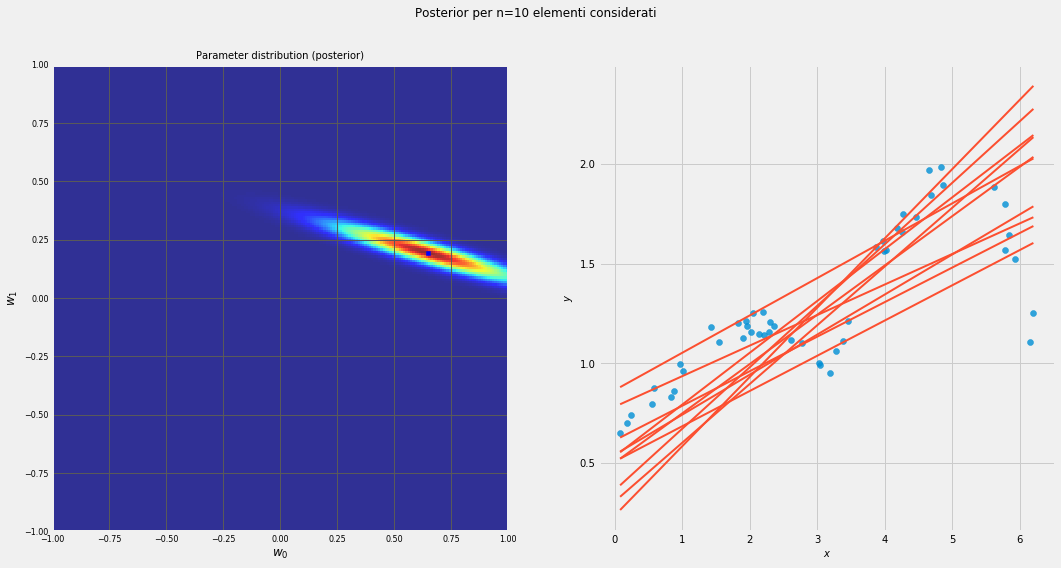

In [27]:
l = 10
X_t, t_t = Phi[:l,:], t[:l]
sigma_post = np.linalg.inv(sigma_prior+beta*np.dot(X_t.T,X_t))
mu_post=beta*sigma_post.dot(X_t.T.dot(t_t)).flatten()
sdx = np.sqrt(sigma_post[0,0])
sdy = np.sqrt(sigma_post[1,1])
    
func=np.vectorize(lambda x,y:st.multivariate_normal.pdf([x,y],mu_post,sigma_post))
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
XX,YY = np.meshgrid(x, y)
Z=func(XX,YY)
    
sample_post=np.random.multivariate_normal(mu_post, sigma_post, 10)
    
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax=plt.subplot(1,2,1)
ax.set_aspect(1)
ax.scatter(mu_post[0], mu_post[1], s=20, marker='s', color='b')
imshow_handle = ax.imshow(Z, origin='lower', extent=(x.min(),x.max(), y.min(), y.max()), aspect='auto', alpha=.8)
ax.set_xlabel('$w_0$', fontsize=12)
ax.set_ylabel('$w_1$', fontsize=12)
ax.set_title('Parameter distribution (posterior)')
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.grid(b=True, which='both', color='0.35')
ax=plt.subplot(1,2,2)
ax.scatter(X, t, marker='o', alpha=.8)
plt.xlabel(u'$x$', fontsize=10)
plt.ylabel('$y$', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for w in sample_post:
    yy=Phixx.dot(w)
    ax.plot(xx,yy, c=colors[1])
plt.suptitle(u'Posterior per n={0:2d} elementi considerati'.format(l))
plt.show()

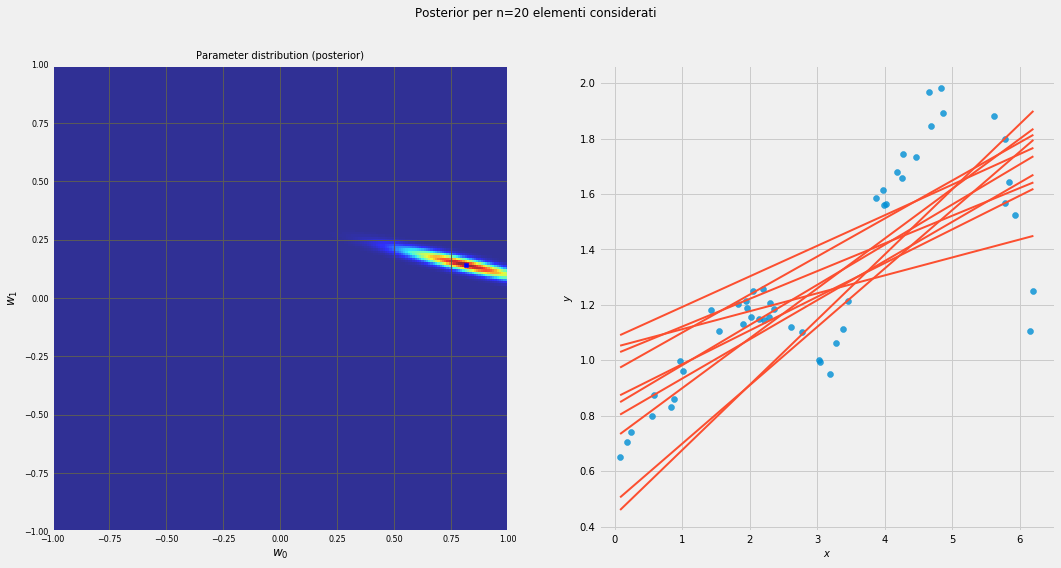

In [28]:
l = 20
X_t, t_t = Phi[:l,:], t[:l]
sigma_post = np.linalg.inv(sigma_prior+beta*np.dot(X_t.T,X_t))
mu_post=beta*sigma_post.dot(X_t.T.dot(t_t)).flatten()
sdx = np.sqrt(sigma_post[0,0])
sdy = np.sqrt(sigma_post[1,1])
    
func=np.vectorize(lambda x,y:st.multivariate_normal.pdf([x,y],mu_post,sigma_post))
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
XX,YY = np.meshgrid(x, y)
Z=func(XX,YY)
    
sample_post=np.random.multivariate_normal(mu_post, sigma_post, 10)
    
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax=plt.subplot(1,2,1)
ax.set_aspect(1)
ax.scatter(mu_post[0], mu_post[1], s=20, marker='s', color='b')
imshow_handle = ax.imshow(Z, origin='lower', extent=(x.min(),x.max(), y.min(), y.max()), aspect='auto', alpha=.8)
ax.set_xlabel('$w_0$', fontsize=12)
ax.set_ylabel('$w_1$', fontsize=12)
ax.set_title('Parameter distribution (posterior)')
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.grid(b=True, which='both', color='0.35')
ax=plt.subplot(1,2,2)
ax.scatter(X, t, marker='o', alpha=.8)
plt.xlabel(u'$x$', fontsize=10)
plt.ylabel('$y$', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for w in sample_post:
    yy=Phixx.dot(w)
    ax.plot(xx,yy, c=colors[1])
plt.suptitle(u'Posterior per n={0:2d} elementi considerati'.format(l))
plt.show()

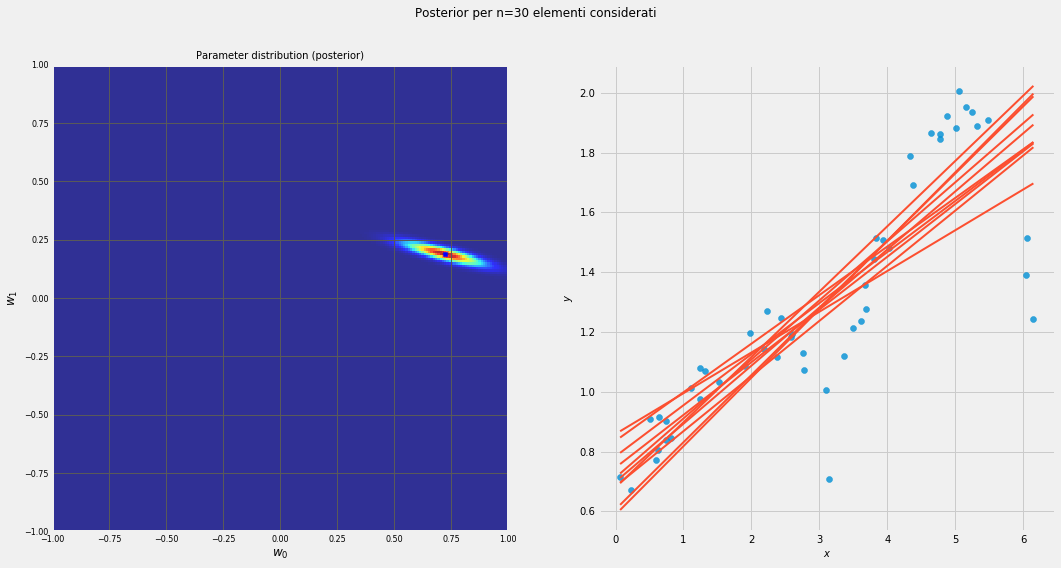

In [11]:
l = 30
X_t, t_t = Phi[:l,:], t[:l]
sigma_post = np.linalg.inv(sigma_prior+beta*np.dot(X_t.T,X_t))
mu_post=beta*sigma_post.dot(X_t.T.dot(t_t)).flatten()
sdx = np.sqrt(sigma_post[0,0])
sdy = np.sqrt(sigma_post[1,1])
    
func=np.vectorize(lambda x,y:st.multivariate_normal.pdf([x,y],mu_post,sigma_post))
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
XX,YY = np.meshgrid(x, y)
Z=func(XX,YY)
    
sample_post=np.random.multivariate_normal(mu_post, sigma_post, 10)
    
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax=plt.subplot(1,2,1)
ax.set_aspect(1)
ax.scatter(mu_post[0], mu_post[1], s=20, marker='s', color='b')
imshow_handle = ax.imshow(Z, origin='lower', extent=(x.min(),x.max(), y.min(), y.max()), aspect='auto', alpha=.8)
ax.set_xlabel('$w_0$', fontsize=12)
ax.set_ylabel('$w_1$', fontsize=12)
ax.set_title('Parameter distribution (posterior)')
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.grid(b=True, which='both', color='0.35')
ax=plt.subplot(1,2,2)
ax.scatter(X, t, marker='o', alpha=.8)
plt.xlabel(u'$x$', fontsize=10)
plt.ylabel('$y$', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for w in sample_post:
    yy=Phixx.dot(w)
    ax.plot(xx,yy, c=colors[1])
plt.suptitle(u'Posterior per n={0:2d} elementi considerati'.format(l))
plt.show()